In [1]:
%matplotlib inline
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
import string
text = '''Batman's secret identity is Bruce Wayne, an American billionaire, playboy, philanthropist, 
and owner of Wayne Enterprises. After witnessing the murder of his parents Thomas Wayne and Martha Wayne
as a child, he swore vengeance against criminals, an oath tempered by a sense of justice. Wayne trains
himself physically and intellectually and crafts a bat-inspired persona to fight crime. Batman operates 
in the fictional Gotham City, with assistance from various supporting characters, including his butler 
Alfred, police commissioner Gordon, and vigilante allies such as Robin. Unlike most superheroes, Batman 
does not possess any superpowers; rather, he relies on his genius intellect, physical prowess, martial 
arts abilities, detective skills, science and technology, vast wealth, intimidation, and indomitable will.
A large assortment of villains make up Batman's rogues gallery, including his archenemy, the Joker.
'''

In [13]:
def create_cooccurence(text):
    '''Takes input a text of words
       and create a cooccurence 
       matrix for the same. Returns
       a Numpy array
    '''
    sentences = nltk.sent_tokenize(text)
    for i in range(len(sentences)):
        sentences[i] = [word for word in nltk.word_tokenize(sentences[i]) if word not in nltk.corpus.stopwords.words('english')\
                        and word not in string.punctuation and word != "'s" and word not in string.uppercase and word not\
                        in string.lowercase]
    
    ## Collecting all the words in the sentences
    words = []
    for sent in sentences:
        for word in sent:
            words.append(word)
            
    ## Creating a list of unique words
    tokens = list(set(words))
    
    ## Creating mapping for each word and its entry in the matrix
    mapping = dict((w,i) for i,w in enumerate(tokens))
    
    matrix = np.zeros((len(tokens),len(tokens)))
    for token in tokens:
        row = mapping[token]
        for sent in sentences:
            if token in sent:
                index = sent.index(token) - 1
                if index >= 0:
                    matrix[row][mapping[sent[index]]] += 1
                index = sent.index(token) + 1
                if index < len(sent):
                    matrix[row][mapping[sent[index]]] += 1
    
    return matrix,mapping
    

In [18]:
text = 'I love flying. I enjoy NLP. Google is fun'
cooccurence,mapping = create_cooccurence(text)

In [19]:
U,S,V = np.linalg.svd(cooccurence)

In [20]:
index_to_word = dict((mapping[w],w) for w in mapping.keys())

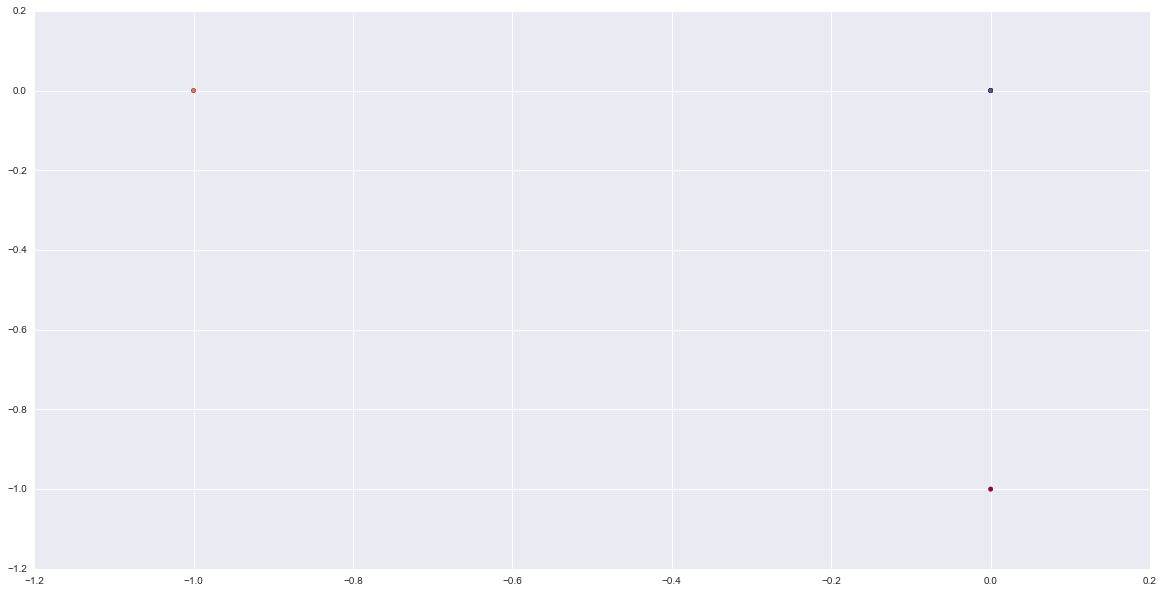

In [30]:
plt.scatter(U[:,0],U[:,1],c = mapping.values(),cmap=plt.cm.Spectral)

In [25]:
print U

[[ 0. -1.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.]]


In [26]:
print mapping

{'enjoy': 0, 'NLP': 1, 'Google': 2, 'love': 3, 'flying': 4, 'fun': 5}


In [28]:
cooccurence

array([[ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.]])